<a href="https://colab.research.google.com/github/naman065/EE-655-/blob/main/EE_655_ASSN_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

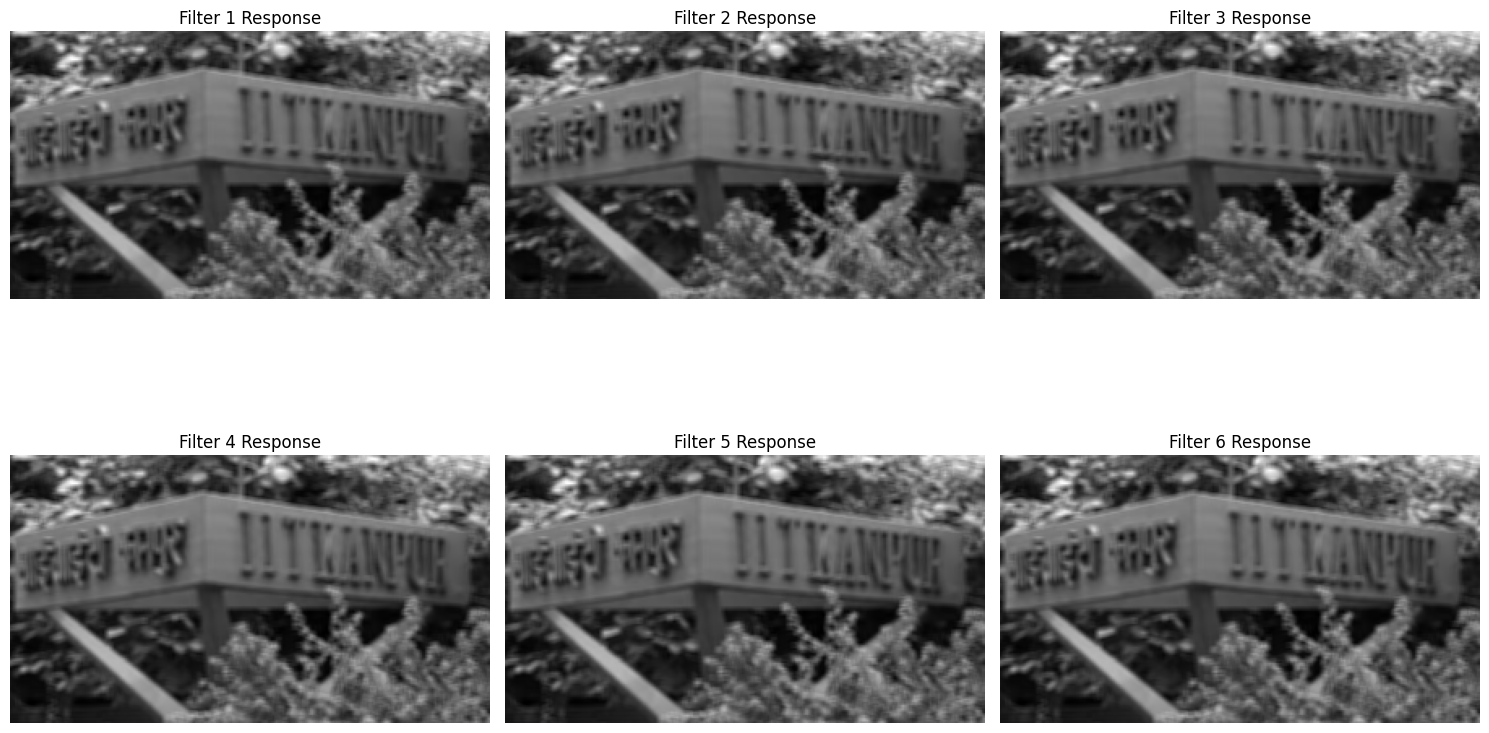

In [40]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image_path = "/content/iitk_dcbc8fcc-7655-4c6f-bb89-3a0b56dbbfbe.png"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Compute the integral image
integral_image = cv2.integral(image)

filter1 = np.array([[-1, -1, 1, 1],
                     [-1, -1, 1, 1],
                     [1, 1, -1, -1],
                     [1, 1, -1, -1]])

filter2 = np.array([[-1, -1, -1, -1],
                     [-1, -1, -1, -1],
                     [1, 1, 1, 1],
                     [1, 1, 1, 1]])

filter3 = np.array([[-1, -1, 1, 1],
                     [-1, -1, 1, 1],
                     [-1, -1, 1, 1],
                     [-1, -1, 1, 1]])

filter4 = np.array([[1, 1, -1, -1],
                     [1, 1, -1, -1],
                     [-1, -1, 1, 1],
                     [-1, -1, 1, 1]])

filter5 = np.array([[-1, -1, -1, -1],
                     [-1, -1, -1, -1],
                     [-1, -1, 1, 1],
                     [-1, -1, 1, 1]])

filter6 = np.array([[1, 1, 1, 1],
                     [1, -1, -1, -1],
                     [1, -1, -1, -1],
                     [1, -1, -1, -1]])

filters = [filter1, filter2, filter3, filter4, filter5, filter6]
# Function to apply a filter using the integral image
def apply_filter_integral(integral_img, filter_matrix):
    h, w = filter_matrix.shape
    img_h, img_w = integral_img.shape


    response = np.zeros((img_h - h, img_w - w))

    for i in range(img_h - h):
        for j in range(img_w - w):

            sum_value = (
                integral_img[i + h, j + w] - integral_img[i, j + w] -
                integral_img[i + h, j] + integral_img[i, j]
            )


            response[i, j] = sum_value / np.abs(filter_matrix).sum()


    return response


plt.figure(figsize=(15, 10))

for idx, filter_matrix in enumerate(filters):
    filtered_response = apply_filter_integral(integral_image, filter_matrix)

    plt.subplot(2, 3, idx + 1)
    plt.imshow(filtered_response, cmap='gray')
    plt.title(f"Filter {idx+1} Response")
    plt.axis("off")

plt.tight_layout()
plt.show()


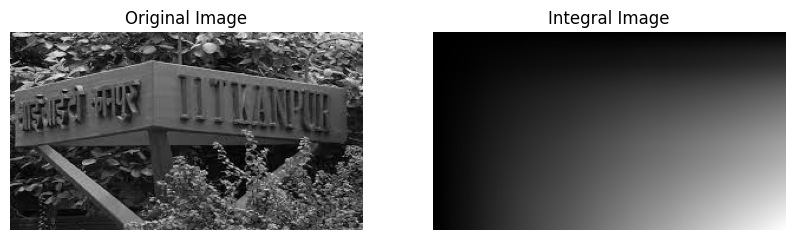

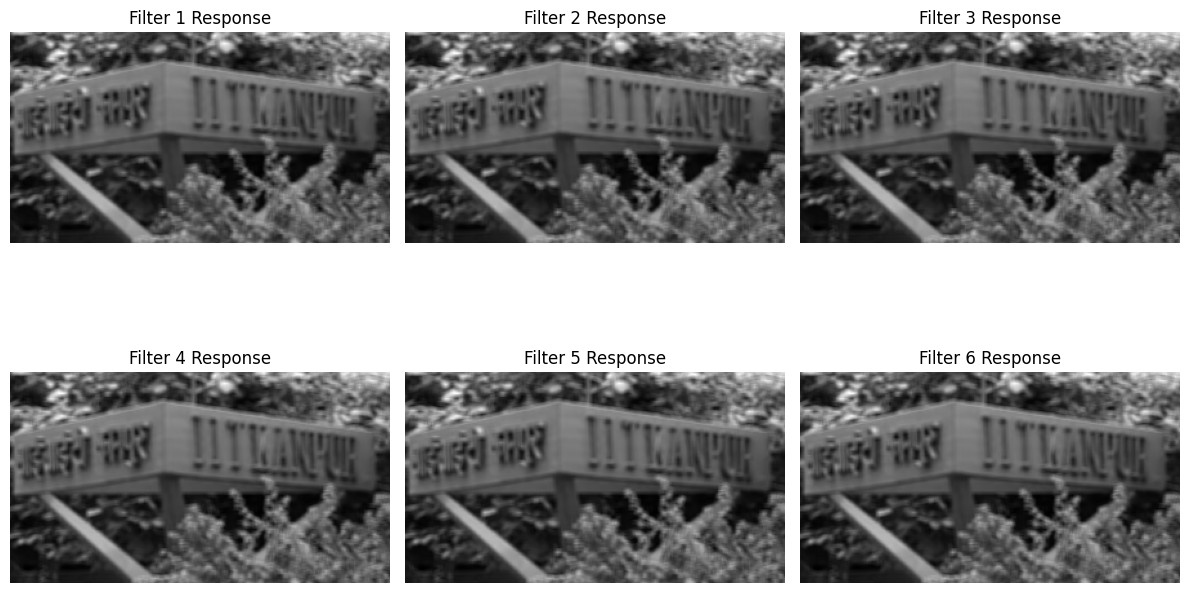

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the grayscale image
image_path = "/content/iitk_dcbc8fcc-7655-4c6f-bb89-3a0b56dbbfbe.png"  # Change this if needed
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Compute the Integral Image
integral_image = cv2.integral(image)

# Display the original image and the integral image
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(integral_image, cmap='gray')
plt.title("Integral Image")
plt.axis("off")

plt.show()

# Define the six 4×4 filters (White = 1, Gray = -1)
filter1 = np.array([[-1, -1, 1, 1],
                     [-1, -1, 1, 1],
                     [1, 1, -1, -1],
                     [1, 1, -1, -1]])

filter2 = np.array([[-1, -1, -1, -1],
                     [-1, -1, -1, -1],
                     [1, 1, 1, 1],
                     [1, 1, 1, 1]])

filter3 = np.array([[-1, -1, 1, 1],
                     [-1, -1, 1, 1],
                     [-1, -1, 1, 1],
                     [-1, -1, 1, 1]])

filter4 = np.array([[1, 1, -1, -1],
                     [1, 1, -1, -1],
                     [-1, -1, 1, 1],
                     [-1, -1, 1, 1]])

filter5 = np.array([[-1, -1, -1, -1],
                     [-1, -1, -1, -1],
                     [-1, -1, 1, 1],
                     [-1, -1, 1, 1]])

filter6 = np.array([[0, 0, 0,0],
                     [-1, 0, 1,0],
                     [-2, 0, 2,0],
                     [-1, 0, 1,0]])

filters = [filter1, filter2, filter3, filter4, filter5, filter6]

# Function to apply a filter using the integral image
def apply_filter_integral(integral_img, filter_matrix):
    h, w = filter_matrix.shape
    img_h, img_w = integral_img.shape

    response = np.zeros((img_h - h - 1, img_w - w - 1))

    for i in range(img_h - h - 1):
        for j in range(img_w - w - 1):
            sum_value = (
                integral_img[i + h, j + w] - integral_img[i, j + w] -
                integral_img[i + h, j] + integral_img[i, j]
            )


            response[i, j] = sum_value / (h * w)

    return response


# Apply each filter and display the results
plt.figure(figsize=(12, 8))

for idx, filter_matrix in enumerate(filters):
    filtered_response = apply_filter_integral(integral_image, filter_matrix)

    plt.subplot(2, 3, idx + 1)
    plt.imshow(filtered_response, cmap='gray')
    plt.title(f"Filter {idx+1} Response")
    plt.axis("off")

plt.tight_layout()
plt.show()


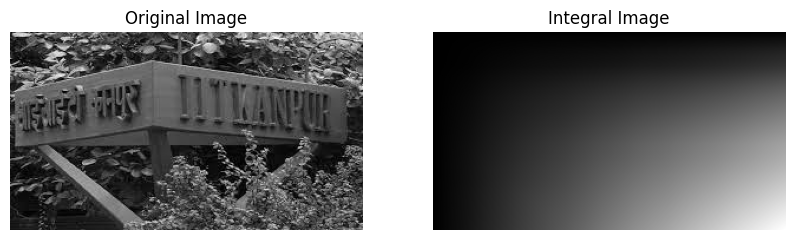

<ipython-input-34-442bd04ea4fe>:56: RuntimeWarning: overflow encountered in scalar subtract
  integral_img[i + h, j + w] - integral_img[i, j + w] -
<ipython-input-34-442bd04ea4fe>:56: RuntimeWarning: overflow encountered in scalar add
  integral_img[i + h, j + w] - integral_img[i, j + w] -


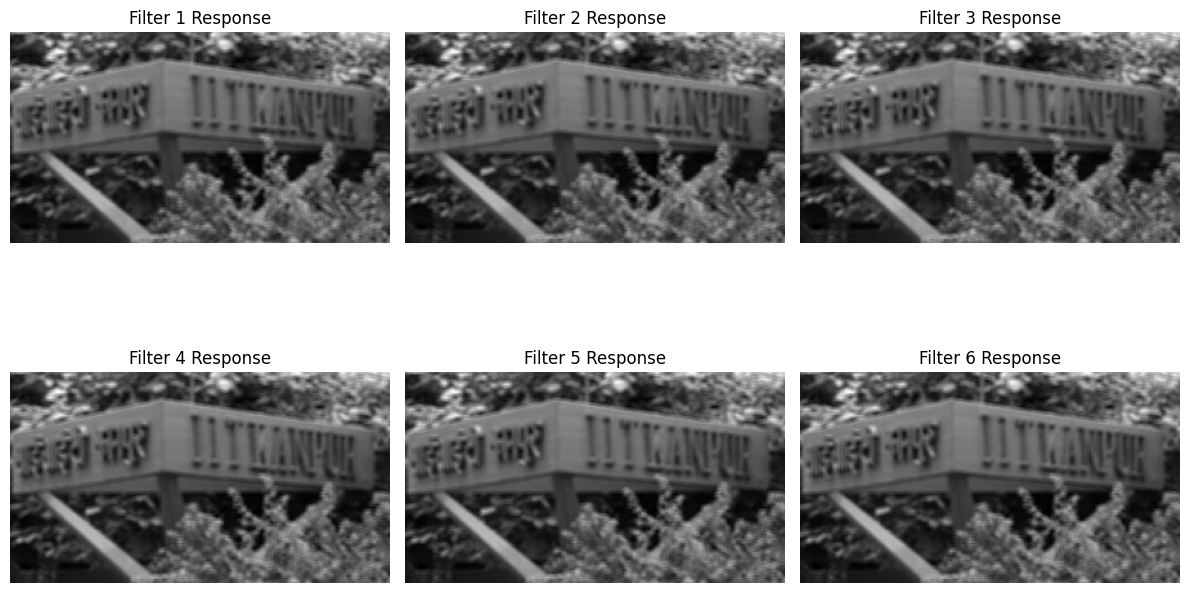

In [39]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread("/content/iitk_dcbc8fcc-7655-4c6f-bb89-3a0b56dbbfbe.png", cv2.IMREAD_GRAYSCALE)

# Computing the integral image
integral_image = np.cumsum(np.cumsum(image, axis=0), axis=1)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(integral_image, cmap='gray')
plt.title("Integral Image")
plt.axis("off")

plt.show()

# Define the 6 given 4×4 filters
filter1 = np.array([[-1, -1, 1, 1],
                     [-1, -1, 1, 1],
                     [1, 1, -1, -1],
                     [1, 1, -1, -1]])

filter2 = np.array([[-1, -1, -1, -1],
                     [-1, -1, -1, -1],
                     [1, 1, 1, 1],
                     [1, 1, 1, 1]])

filter3 = np.array([[-1, -1, 1, 1],
                     [-1, -1, 1, 1],
                     [-1, -1, 1, 1],
                     [-1, -1, 1, 1]])

filter4 = np.array([[1, 1, -1, -1],
                     [1, 1, -1, -1],
                     [-1, -1, 1, 1],
                     [-1, -1, 1, 1]])

filter5 = np.array([[-1, -1, -1, -1],
                     [-1, -1, -1, -1],
                     [-1, -1, 1, 1],
                     [-1, -1, 1, 1]])

filter6 = np.array([[1, 1, 1, 1],
                     [1, -1, -1, -1],
                     [1, -1, -1, -1],
                     [1, -1, -1, -1]])


filters = [filter1, filter2, filter3, filter4, filter5, filter6]

# Function to compute filter response using integral image
def apply_filter(integral_img, filter_mask):
    h, w = filter_mask.shape
    img_h, img_w = integral_img.shape
    response = np.zeros((img_h - h, img_w - w))

    for i in range(img_h - h):
        for j in range(img_w - w):
            sum_value = (
                integral_img[i + h - 1, j + w - 1]
                - (integral_img[i - 1, j + w - 1] if i > 0 else 0)
                - (integral_img[i + h - 1, j - 1] if j > 0 else 0)
                + (integral_img[i - 1, j - 1] if i > 0 and j > 0 else 0)
            )
            response[i, j] = sum_value / np.abs(filter_matrix).sum()


    return response

plt.figure(figsize=(12, 8))

for idx, filter_matrix in enumerate(filters):
    responsee = apply_filter_integral(integral_image, filter_matrix)

    plt.subplot(2, 3, idx + 1)
    plt.imshow(responsee, cmap='gray')
    plt.title(f"Filter {idx+1} Response")
    plt.axis("off")

plt.tight_layout()
plt.show()


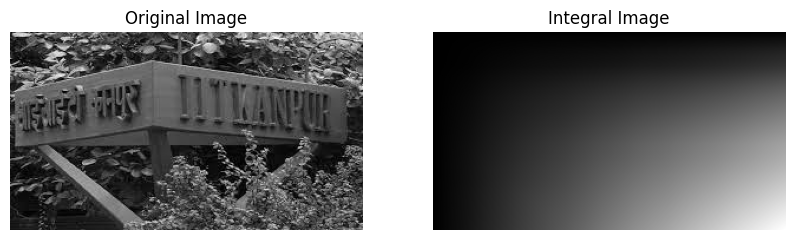

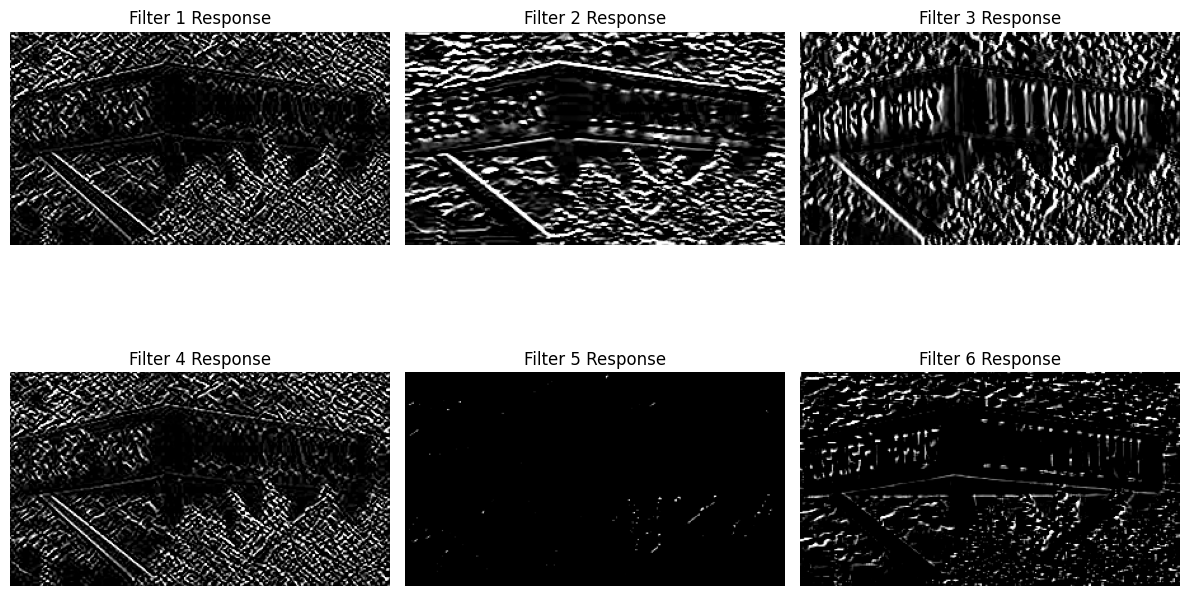

In [38]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread("/content/iitk_dcbc8fcc-7655-4c6f-bb89-3a0b56dbbfbe.png", cv2.IMREAD_GRAYSCALE)

# Compute the integral image using OpenCV
integral_image = cv2.integral(image)[1:, 1:]

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(integral_image, cmap='gray')
plt.title("Integral Image")
plt.axis("off")

plt.show()

filter1 = np.array([[-1, -1, 1, 1],
                     [-1, -1, 1, 1],
                     [1, 1, -1, -1],
                     [1, 1, -1, -1]])

filter2 = np.array([[-1, -1, -1, -1],
                     [-1, -1, -1, -1],
                     [1, 1, 1, 1],
                     [1, 1, 1, 1]])

filter3 = np.array([[-1, -1, 1, 1],
                     [-1, -1, 1, 1],
                     [-1, -1, 1, 1],
                     [-1, -1, 1, 1]])

filter4 = np.array([[1, 1, -1, -1],
                     [1, 1, -1, -1],
                     [-1, -1, 1, 1],
                     [-1, -1, 1, 1]])

filter5 = np.array([[-1, -1, -1, -1],
                     [-1, -1, -1, -1],
                     [-1, -1, 1, 1],
                     [-1, -1, 1, 1]])

filter6 = np.array([[1, 1, 1, 1],
                     [1, -1, -1, -1],
                     [1, -1, -1, -1],
                     [1, -1, -1, -1]])

filters = [filter1, filter2, filter3, filter4, filter5, filter6]

plt.figure(figsize=(12, 8))

# Applying each filter using OpenCV's filter2D function
for idx, filter_mask in enumerate(filters):
    response = cv2.filter2D(image, -1, filter_mask)

    plt.subplot(2, 3, idx + 1)
    plt.imshow(response, cmap='gray')
    plt.title(f"Filter {idx+1} Response")
    plt.axis("off")

plt.tight_layout()
plt.show()
